**empirical distributions** - based on empirical observations.  Necessarily finite.

**analytic distribution** - CDF is a mathematical function.

**model** - simplification that leaves out unneeded details

In [10]:
%matplotlib inline
import math

import numpy as np
import pandas

import nsfg
import thinkplot
import thinkstats2

import analytic

###Exponential Distribution:

The CDF for the exponential distribution is 
$$CDF(x) = 1 - e^{-\lambda x}$$

where $\lambda$ determines the shape of the distribution.

*  often used to measure **interarrival times**.  If events are equally likely to occur at any time, the distribution looks like an exponential distribution.



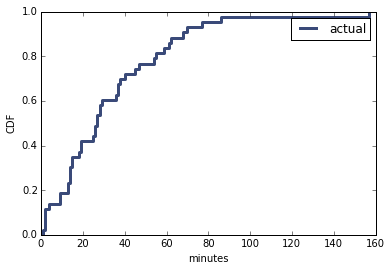

In [11]:
df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='minutes', ylabel='CDF')


###how can we tell if it's exponential?

plot the **complimentary CDF**, which is 1 - CDF(x) on a log(y) scale.  If you plot a CCDF of a dataset that you think is exponential, you expect to see 
  
  $$y \approx e^{-\lambda x} $$
  
taking the log of both sides:
   
   $$\log y \approx -\lambda x$$
   
so on a log-y scalse, the CCDF is a straight line with slope $-\lambda$.


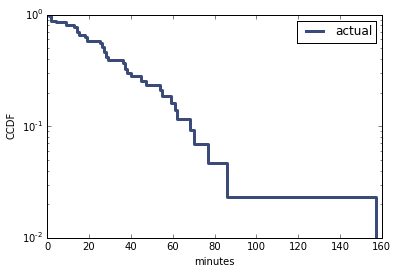

In [12]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel="minutes",
               ylabel="CCDF",
               yscale='log')

$\lambda$ can be interpreted as the number of events that occur on average in a unit of time.

**mean of exponential distribution** is ${1 }\ /\ {\lambda}$ .

###Normal Distribution

*  characterized by the mean and the standard deviation. 
*  **standard nomral distribution**: $\mu = 0$ and $\sigma = 1$
*  CDF is defied by an integral that does not have a closed form solution.  instead, use

```python
import scipy.stats
scipy.stats.norm.cdf(0)
```
    --> 0.5
    
*  to test normal distribution, use **normal pobability plot**.

    1. Sort the values in the sample.
    
    2. From a standard normal distribution, generate a random sample with the same size as the sample and sort it.
    
    3. Plot the sorted values from the sample versus the random values.

  if the distribution of the sample is approximately normal the result is a straight line with intercept $\mu$ and slope $\sigma$.
    
  To do this use:
  
```python
xs, ys = thinkstats2.NormalProbability(sample)
```
  
  `ys` contains the sorted values from `sample`; `xs` contains the random values from the standard normal distribution.
    

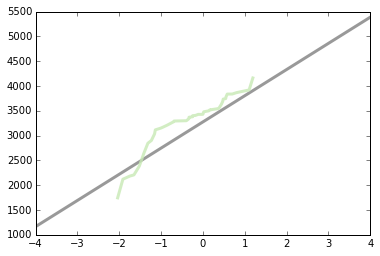

In [24]:
def MakeNormalPlot(weights):
    mean = weights.mean()
    std = weights.std()
    
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')
    
    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='birth weights')

MakeNormalPlot(df.weight_g)

###The Lognormal Distribution

**lognormal distribution** when the logarithms of a set of values have a normal distribution.

$$
CDF_{lognormal}(x) = CDF_{normal}(logx)
$$

$\mu$ and $\sigma$ are the parameters, but not the mean and standard deviation.

**mean** is $\exp(\mu + \sigma^2 / 2)$ and the **standard deviation** is ugly.

*  If you plot a lognormal's CDF on a logx scale, it will look like a normal distribution.

*  To test it, you can make a normal probability plot using the log of the values in the sample.


###The Pareto Distribution

The CDF of the Pareto distribution is:
$$
CDF(x) = 1 - \bigg(\dfrac{x}{x_m}\bigg) ^{-\alpha}
$$

The params are:
*  $x_m$, minimum possible value
*  $\alpha$ 

**To Test:**
on a log-log scale, the CCDF looks like a straight line with slope, $\alpha$ and intercept, $x_m$